In [1]:
!nvidia-smi

Sat May 30 10:44:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import os
import sys
import glob
import zipfile
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array

In [3]:
# Download ResNet50 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

# Download Inception_v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Download VGG16 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-30 10:44:58--  https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 2607:f8b0:4004:807::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94765736 (90M) [application/octet-stream]
Saving to: ‘/tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/resnet50_weigh 100%[===================>]  90.38M   130MB/s    in 0.7s    

2020-05-30 10:44:59 (130 MB/s) - ‘/tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [94765736/94765736]

--2020-05-30 10:45:00--  https://storage.googleapis.com/tensorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 2607:f8b0:4004:807::2010
Connecting to storage.google

In [0]:
# Unzip dataset
local_zip = '/content/drive/My Drive/Colab Notebooks/intel-image-classification-20200427T180512Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# Define train and validation directories
base_dir = '/tmp/intel-image-classification'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_buildings_dir = os.path.join(train_dir, 'buildings')

# Directory with our training cat pictures
train_forest_dir = os.path.join(train_dir, 'forest')


# Directory with our training cat pictures
train_glacier_dir = os.path.join(train_dir, 'glacier')


# Directory with our training cat pictures
train_mountain_dir = os.path.join(train_dir, 'mountain')


# Directory with our training cat pictures
train_sea_dir = os.path.join(train_dir, 'sea')


# Directory with our training cat pictures
train_street_dir = os.path.join(train_dir, 'street')

# Directory with our validation cat pictures
validation_buildings_dir = os.path.join(validation_dir, 'buildings')

# Directory with our validation dog pictures
validation_forest_dir = os.path.join(validation_dir, 'forest') 

# Directory with our validation cat pictures
validation_glacier_dir = os.path.join(validation_dir, 'glacier')

# Directory with our validation dog pictures
validation_mountain_dir = os.path.join(validation_dir, 'mountain') 

# Directory with our validation cat pictures
validation_sea_dir = os.path.join(validation_dir, 'sea')

# Directory with our validation dog pictures
validation_street_dir = os.path.join(validation_dir, 'street') 

train_buildings_fnames = glob.glob(train_buildings_dir+"/*")
train_forest_fnames = glob.glob(train_forest_dir+"/*")
train_glacier_fnames = glob.glob(train_glacier_dir+"/*")
train_mountain_fnames = glob.glob(train_mountain_dir+"/*")
train_sea_fnames = glob.glob(train_sea_dir+"/*")
train_street_fnames = glob.glob(train_street_dir+"/*")

In [0]:
sample_size = 5

sample_buildings_fnames = np.random.choice(train_buildings_fnames, size=sample_size, replace=False)
sample_forest_fnames = np.random.choice(train_forest_fnames, size=sample_size, replace=False)
sample_glacier_fnames = np.random.choice(train_glacier_fnames, size=sample_size, replace=False)
sample_mountain_fnames = np.random.choice(train_mountain_fnames, size=sample_size, replace=False)
sample_sea_fnames = np.random.choice(train_sea_fnames, size=sample_size, replace=False)
sample_street_fnames = np.random.choice(train_street_fnames, size=sample_size, replace=False)

sample_buildings_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_buildings_fnames]
sample_forest_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_forest_fnames]
sample_glacier_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_glacier_fnames]
sample_mountain_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_mountain_fnames]
sample_sea_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_sea_fnames]
sample_street_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_street_fnames]

sample_buildings_images = np.array(sample_buildings_images).astype('float32')/255.
sample_forest_images = np.array(sample_forest_images).astype('float32')/255.
sample_glacier_images = np.array(sample_glacier_images).astype('float32')/255.
sample_mountain_images = np.array(sample_mountain_images).astype('float32')/255.
sample_sea_images = np.array(sample_sea_images).astype('float32')/255.
sample_street_images = np.array(sample_street_images).astype('float32')/255.

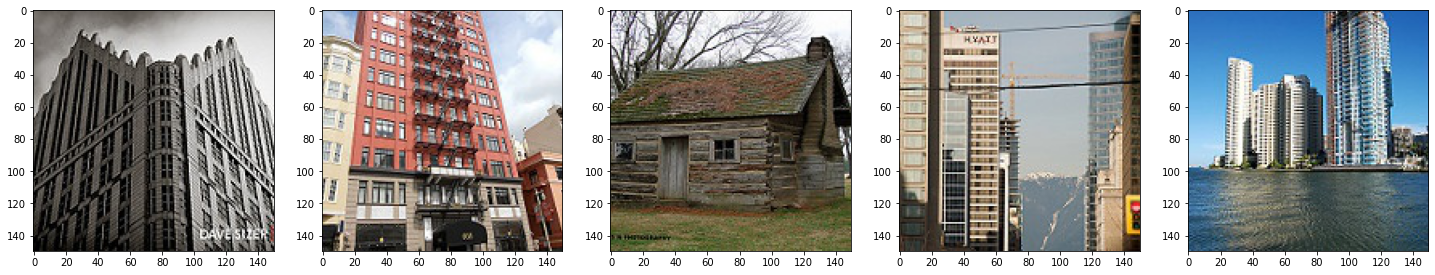

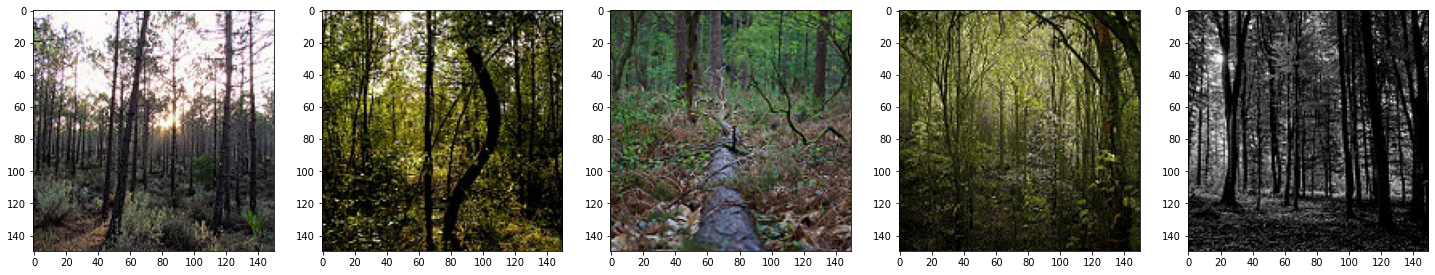

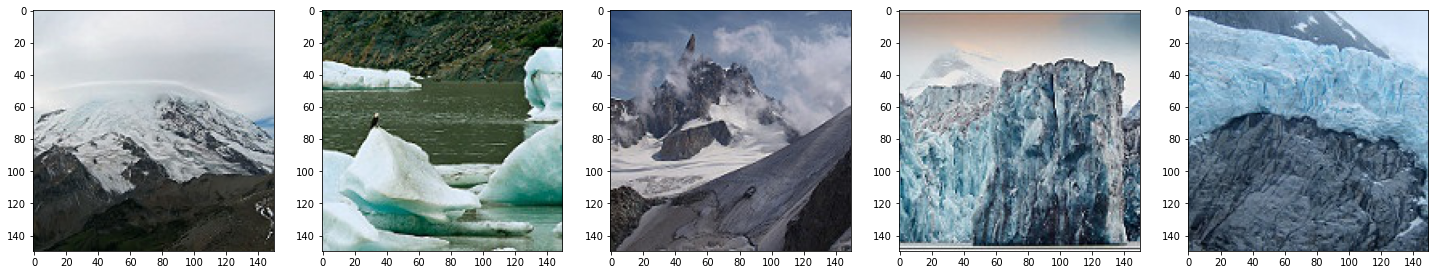

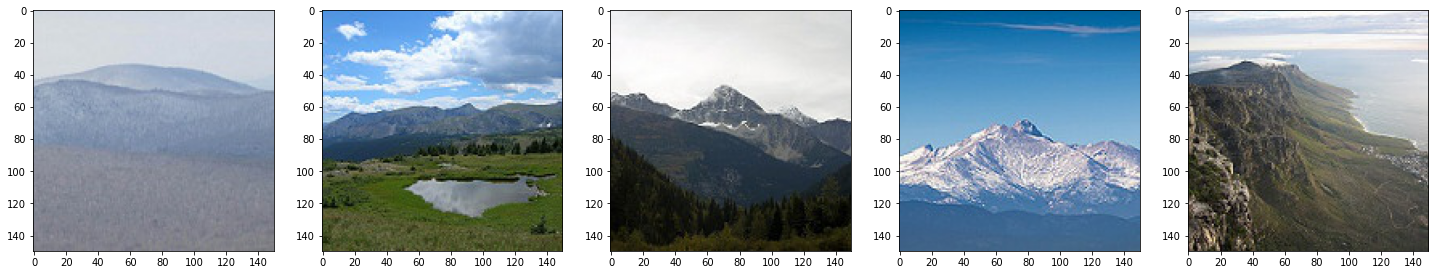

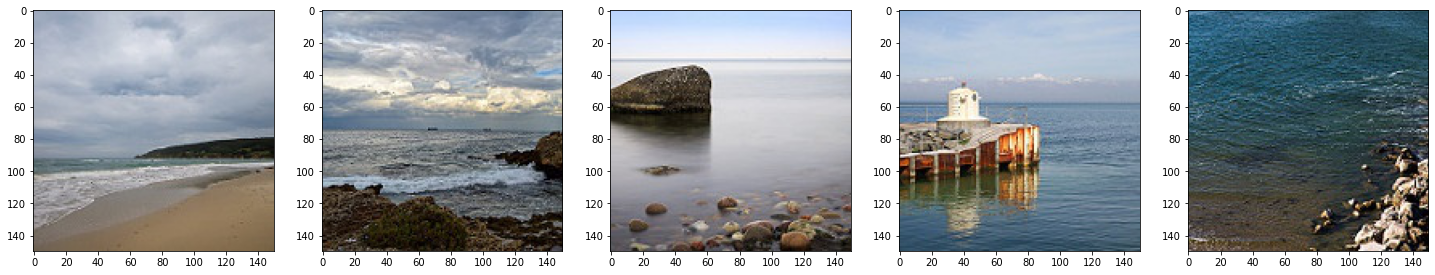

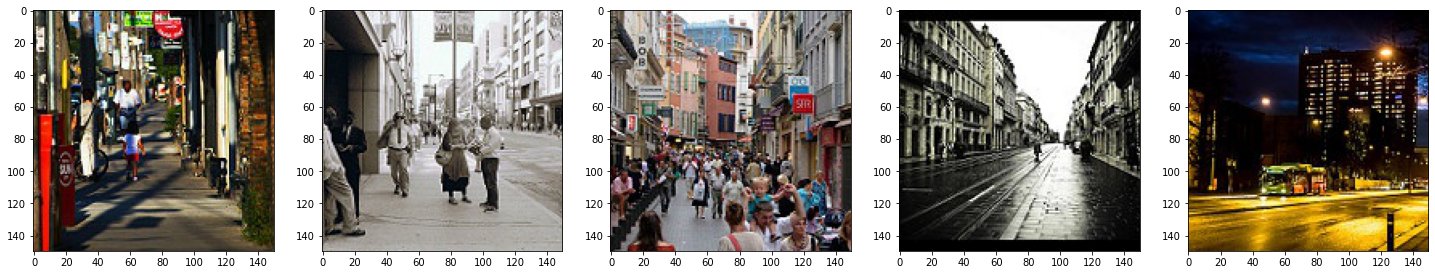

In [7]:
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_buildings_images[i])

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_forest_images[i])

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_glacier_images[i])

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_mountain_images[i])

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_sea_images[i])

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_street_images[i])

In [8]:
# Image augmentation techniques and data generators
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))    

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 6000 images belonging to 6 classes.
Found 2400 images belonging to 6 classes.


In [0]:
# Build models
vgg16_weights_path = '/tmp/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
inception_v3_weights_path = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet50_weights_path = '/tmp/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

vgg16_model = VGG16(input_shape = (150, 150, 3),
                    include_top = False,
                    weights = None)

inception_v3_model = InceptionV3(input_shape = (150, 150, 3),
                                 include_top = False,
                                 weights = None)

resnet50_model = ResNet50(input_shape = (150, 150, 3),
                          include_top = False,
                          weights = None)

vgg16_model.load_weights(vgg16_weights_path)
inception_v3_model.load_weights(inception_v3_weights_path)
resnet50_model.load_weights(resnet50_weights_path)

In [0]:
# Freeze layers
for layer in vgg16_model.layers:
  layer.trainable = False

for layer in inception_v3_model.layers:
  layer.trainable = False

for layer in resnet50_model.layers:
  layer.trainable = False

In [0]:
vgg16_cut_layer = 'block4_pool'
inception_v3_cut_layer = 'mixed7'
resnet50_cut_layer = 'conv5_block3_add'

def compile_model(pre_trained_model, cut_layer):
  last_layer = pre_trained_model.get_layer(cut_layer)
  last_output = last_layer.output

  x = layers.Flatten()(last_output)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)                  
  x = layers.Dense(1, activation='softmax')(x)           

  model = Model(pre_trained_model.input, x) 
  model.compile(optimizer = RMSprop(lr=0.0001), 
                loss = 'categorical_crossentropy', 
                metrics = ['accuracy'])
  return model

transfered_vgg16_model = compile_model(vgg16_model, vgg16_cut_layer)
transfered_inception_v3_model = compile_model(inception_v3_model, inception_v3_cut_layer)
transfered_resnet50_model= compile_model(resnet50_model, resnet50_cut_layer)

In [23]:
history_vgg16 = transfered_vgg16_model.fit(
                            train_generator,
                            validation_data = validation_generator,
                            steps_per_epoch = 100,
                            epochs = 20,
                            validation_steps = 50,
                            verbose = 2)

Epoch 1/20
100/100 - 18s - loss: 1.0042 - accuracy: 0.8773 - val_loss: 0.6966 - val_accuracy: 0.9042
Epoch 2/20
100/100 - 18s - loss: 0.6902 - accuracy: 0.9177 - val_loss: 0.5048 - val_accuracy: 0.9422
Epoch 3/20
100/100 - 18s - loss: 0.6069 - accuracy: 0.9255 - val_loss: 0.5225 - val_accuracy: 0.9390
Epoch 4/20
100/100 - 18s - loss: 0.5629 - accuracy: 0.9331 - val_loss: 0.4149 - val_accuracy: 0.9527
Epoch 5/20
100/100 - 18s - loss: 0.5383 - accuracy: 0.9365 - val_loss: 0.4227 - val_accuracy: 0.9485
Epoch 6/20
100/100 - 18s - loss: 0.5216 - accuracy: 0.9388 - val_loss: 0.4275 - val_accuracy: 0.9488
Epoch 7/20
100/100 - 18s - loss: 0.5069 - accuracy: 0.9383 - val_loss: 0.4499 - val_accuracy: 0.9480
Epoch 8/20
100/100 - 18s - loss: 0.5102 - accuracy: 0.9399 - val_loss: 0.4130 - val_accuracy: 0.9495
Epoch 9/20
100/100 - 18s - loss: 0.4969 - accuracy: 0.9443 - val_loss: 0.4013 - val_accuracy: 0.9578
Epoch 10/20
100/100 - 18s - loss: 0.4934 - accuracy: 0.9437 - val_loss: 0.3935 - val_accura

In [25]:
history_inception_v3 = transfered_inception_v3_model.fit(
                            train_generator,
                            validation_data = validation_generator,
                            steps_per_epoch = 100,
                            epochs = 20,
                            validation_steps = 50,
                            verbose = 2)

Epoch 1/20
100/100 - 15s - loss: 0.9540 - accuracy: 0.8868 - val_loss: 0.4585 - val_accuracy: 0.9505
Epoch 2/20
100/100 - 14s - loss: 0.4972 - accuracy: 0.9392 - val_loss: 0.3298 - val_accuracy: 0.9643
Epoch 3/20
100/100 - 15s - loss: 0.4290 - accuracy: 0.9474 - val_loss: 0.3242 - val_accuracy: 0.9597
Epoch 4/20
100/100 - 14s - loss: 0.4113 - accuracy: 0.9532 - val_loss: 0.2963 - val_accuracy: 0.9602
Epoch 5/20
100/100 - 14s - loss: 0.3984 - accuracy: 0.9541 - val_loss: 0.3326 - val_accuracy: 0.9600
Epoch 6/20
100/100 - 14s - loss: 0.4004 - accuracy: 0.9523 - val_loss: 0.2955 - val_accuracy: 0.9645
Epoch 7/20
100/100 - 14s - loss: 0.3667 - accuracy: 0.9578 - val_loss: 0.2920 - val_accuracy: 0.9637
Epoch 8/20
100/100 - 14s - loss: 0.3779 - accuracy: 0.9548 - val_loss: 0.3045 - val_accuracy: 0.9625
Epoch 9/20
100/100 - 14s - loss: 0.3574 - accuracy: 0.9561 - val_loss: 0.2820 - val_accuracy: 0.9673
Epoch 10/20
100/100 - 14s - loss: 0.3432 - accuracy: 0.9594 - val_loss: 0.2861 - val_accura

In [27]:
history_resnet50 = transfered_resnet50_model.fit(
                            train_generator,
                            validation_data = validation_generator,
                            steps_per_epoch = 100,
                            epochs = 20,
                            validation_steps = 50,
                            verbose = 2)

Epoch 1/20
100/100 - 17s - loss: 1.8028 - accuracy: 0.8333 - val_loss: 1.7958 - val_accuracy: 0.8333
Epoch 2/20
100/100 - 17s - loss: 1.7936 - accuracy: 0.8333 - val_loss: 1.7901 - val_accuracy: 0.8333
Epoch 3/20
100/100 - 17s - loss: 1.7875 - accuracy: 0.8333 - val_loss: 1.7995 - val_accuracy: 0.8333
Epoch 4/20
100/100 - 17s - loss: 1.7762 - accuracy: 0.8333 - val_loss: 1.7774 - val_accuracy: 0.8333
Epoch 5/20
100/100 - 17s - loss: 1.7658 - accuracy: 0.8333 - val_loss: 1.7495 - val_accuracy: 0.8333
Epoch 6/20
100/100 - 17s - loss: 1.7334 - accuracy: 0.8333 - val_loss: 1.7221 - val_accuracy: 0.8333
Epoch 7/20
100/100 - 16s - loss: 1.7244 - accuracy: 0.8333 - val_loss: 1.7249 - val_accuracy: 0.8333
Epoch 8/20
100/100 - 17s - loss: 1.7036 - accuracy: 0.8333 - val_loss: 1.7475 - val_accuracy: 0.8333
Epoch 9/20
100/100 - 17s - loss: 1.6955 - accuracy: 0.8333 - val_loss: 1.6825 - val_accuracy: 0.8333
Epoch 10/20
100/100 - 16s - loss: 1.6979 - accuracy: 0.8333 - val_loss: 1.6385 - val_accura

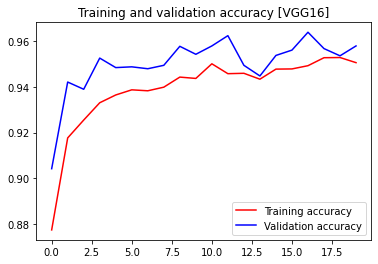

<Figure size 432x288 with 0 Axes>

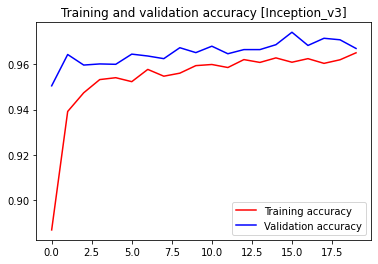

<Figure size 432x288 with 0 Axes>

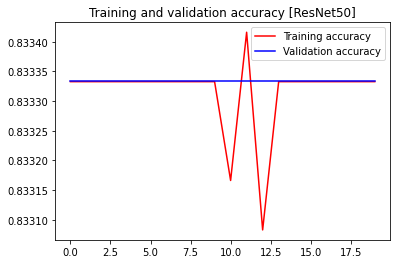

<Figure size 432x288 with 0 Axes>

In [28]:
def plot_acc(history, model_name):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title(f'Training and validation accuracy [{model_name}]')
  plt.legend(loc=0)
  plt.figure()
  plt.show()

plot_acc(history_vgg16, 'VGG16')
plot_acc(history_inception_v3, 'Inception_v3')
plot_acc(history_resnet50, 'ResNet50')

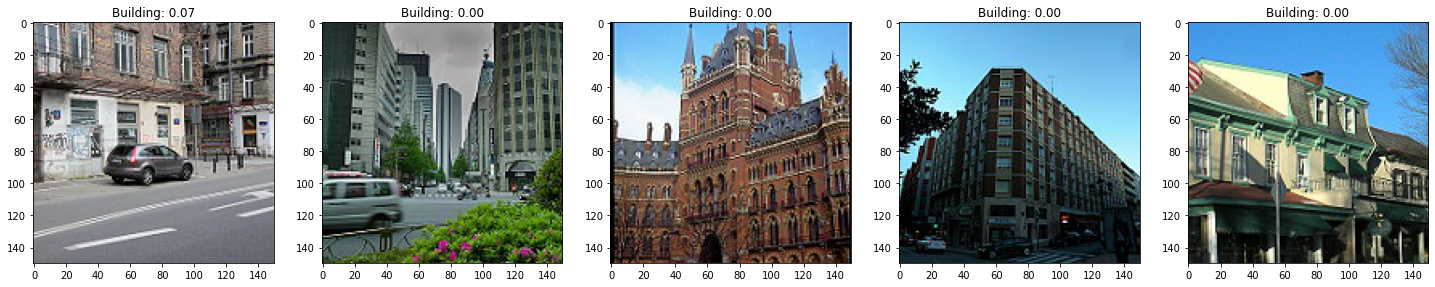

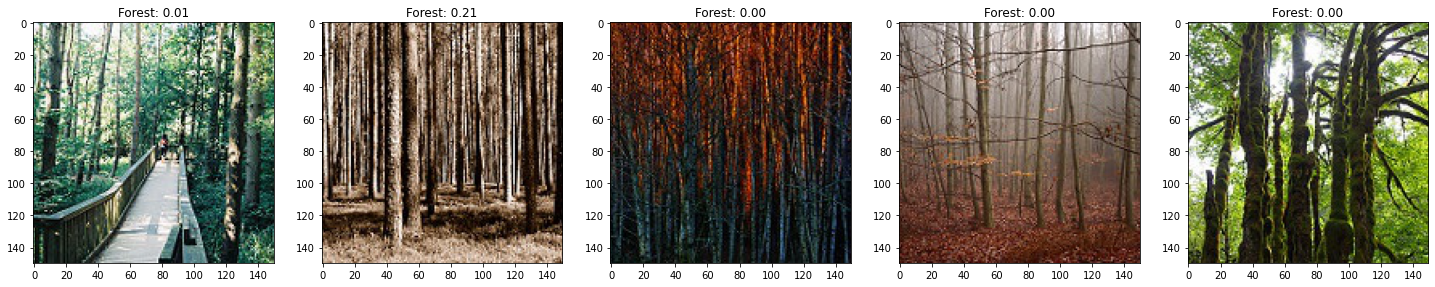

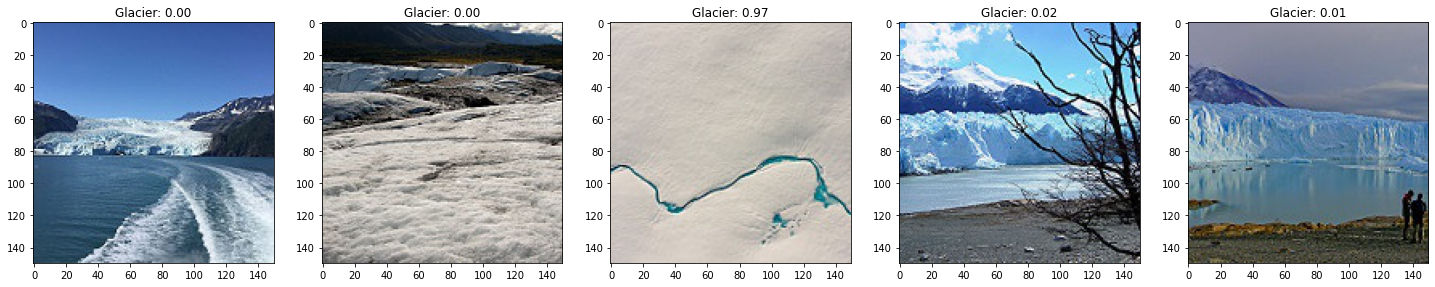

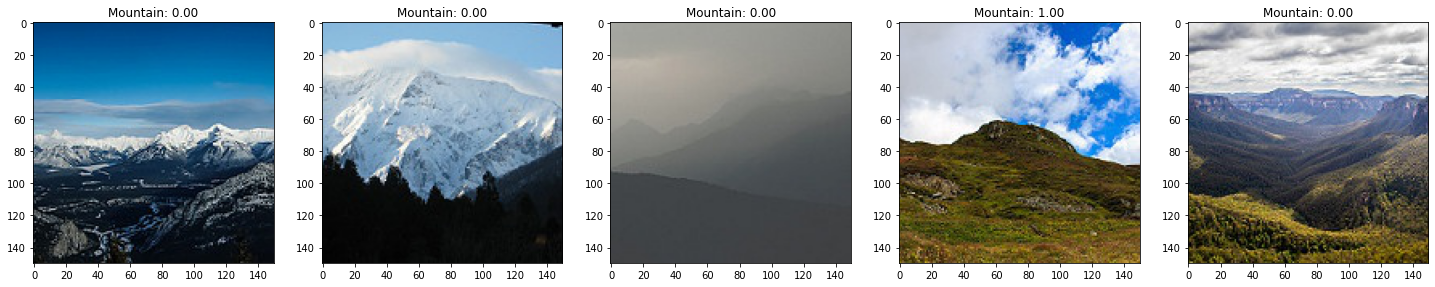

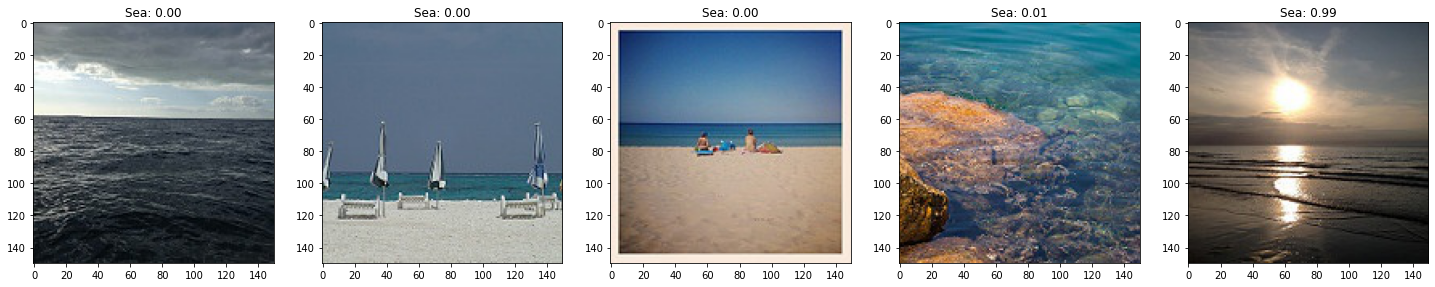

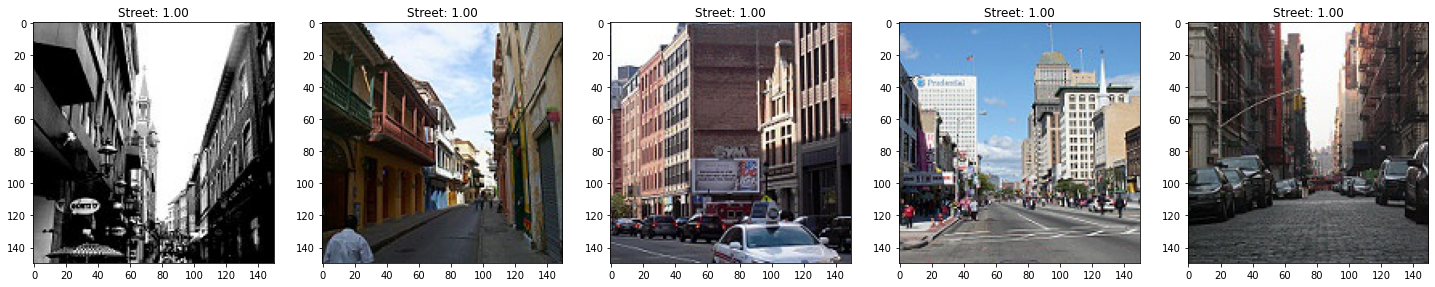

In [53]:
sample_size = 5
model = transfered_inception_v3_model

sample_buildings_fnames = np.random.choice(train_buildings_fnames, size=sample_size, replace=False)
sample_forest_fnames = np.random.choice(train_forest_fnames, size=sample_size, replace=False)
sample_glacier_fnames = np.random.choice(train_glacier_fnames, size=sample_size, replace=False)
sample_mountain_fnames = np.random.choice(train_mountain_fnames, size=sample_size, replace=False)
sample_sea_fnames = np.random.choice(train_sea_fnames, size=sample_size, replace=False)
sample_street_fnames = np.random.choice(train_street_fnames, size=sample_size, replace=False)

sample_buildings_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_buildings_fnames]
sample_forest_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_forest_fnames]
sample_glacier_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_glacier_fnames]
sample_mountain_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_mountain_fnames]
sample_sea_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_sea_fnames]
sample_street_images = [img_to_array(load_img(fname, target_size=(150, 150), interpolation='bilinear')) for fname in sample_street_fnames]

sample_buildings_images = np.array(sample_buildings_images).astype('float32')/255.
sample_forest_images = np.array(sample_forest_images).astype('float32')/255.
sample_glacier_images = np.array(sample_glacier_images).astype('float32')/255.
sample_mountain_images = np.array(sample_mountain_images).astype('float32')/255.
sample_sea_images = np.array(sample_sea_images).astype('float32')/255.
sample_street_images = np.array(sample_street_images).astype('float32')/255.

buildings_pred = model.predict(sample_buildings_images).flatten()
forest_pred = model.predict(sample_forest_images).flatten()
glacier_pred = model.predict(sample_glacier_images).flatten()
mountain_pred = model.predict(sample_mountain_images).flatten()
sea_pred = model.predict(sample_sea_images).flatten()
street_pred = model.predict(sample_street_images).flatten()

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_buildings_images[i])
  ax[i].set_title(f"Building: {buildings_pred[i]:.2f}")

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_forest_images[i])
  ax[i].set_title(f"Forest: {forest_pred[i]:.2f}")

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_glacier_images[i])
  ax[i].set_title(f"Glacier: {glacier_pred[i]:.2f}")

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_mountain_images[i])
  ax[i].set_title(f"Mountain: {mountain_pred[i]:.2f}")

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_sea_images[i])
  ax[i].set_title(f"Sea: {sea_pred[i]:.2f}")

fig, ax = plt.subplots(1, sample_size, figsize=(sample_size * 5, 15))
for i in range(sample_size):
  ax[i].imshow(sample_street_images[i])
  ax[i].set_title(f"Street: {street_pred[5]:.2f}")